In [32]:
from sherlock.utils import approximate_pareto
import glob
import json
import os
import matplotlib.pyplot as plt
import numpy as np

In [33]:
METRICS_PATH = "./metrics"
all_metrics = {}
for fname in glob.iglob(METRICS_PATH + "/*.json"):
    quant_config = "_".join(os.path.basename(fname.replace(" (1)", ""))[:-5].split("_")[-5:])
    with open(fname, "r") as f:    
        metrics_data = json.load(f)
    metrics_data["time"] =  os.path.getmtime(fname)
    all_metrics[quant_config] = metrics_data

y_list = []
ids = []
for k, v in all_metrics.items():
    ids.append(k)
    y_list.append([v["performance"],1/(v["bops"]/1e6)])

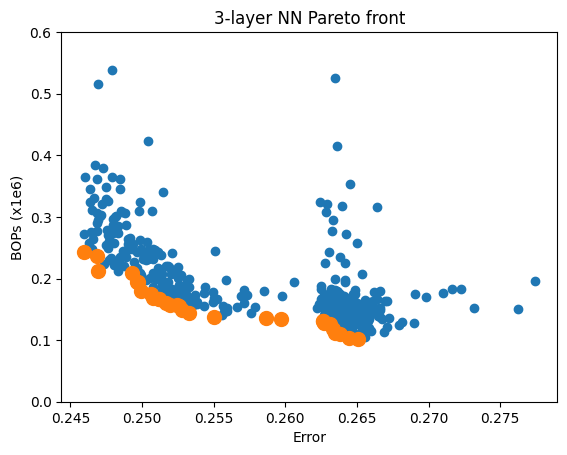

In [34]:
plt.figure()
y = np.array(y_list)
y_pareto = approximate_pareto(y)[0]
plt.scatter(1-y[:,0], 1/y[:,1])
plt.scatter(1-y_pareto[:,0], (1/y_pareto[:,1]),s=100)
plt.xlabel("Error")
plt.ylabel("BOPs (x1e6)")
#plt.yscale("log")
#plt.xlim(0.266, 0.284)
plt.ylim(0, 0.6)
plt.title("3-layer NN Pareto front")
# plt.xlim(left=y[:,0].min()*0.95, right=y[:,0].max()*1.05)
# plt.ylim(bottom=y[:,1].min()*0.95, top=y[:,1].max()*1.05)
plt.show()

In [35]:
pareto_points = np.array(ids)[approximate_pareto(y)[1]].tolist()
print(f"{'Config':12s} {'Perf':6s}  {'BOPS':8s}")
for p in pareto_points:
    print(f"{p:12s} {all_metrics[p]['performance']:.4f}  {all_metrics[p]['bops']:6.2f}")

Config       Perf    BOPS    
8_4_6_8_8    0.7531  211867.69
4_4_4_6_6    0.7414  135873.27
4_6_6_8_4    0.7373  127034.55
6_4_4_6_4    0.7366  111967.83
6_6_6_4_6    0.7494  175091.05
6_4_6_32_6   0.7500  179624.47
8_4_6_6_8    0.7507  209539.98
4_4_4_8_6    0.7450  137643.55
4_4_4_4_6    0.7403  133971.34
4_4_6_4_4    0.7362  109641.63
8_6_6_8_8    0.7531  236366.06
8_4_4_6_6    0.7481  157623.94
6_4_8_4_4    0.7369  125645.77
6_4_6_4_6    0.7474  155758.89
8_4_4_8_6    0.7483  159672.89
4_6_4_8_6    0.7476  157508.25
6_4_6_6_8    0.7503  194758.95
8_6_8_4_8    0.7541  243789.09
8_4_4_4_4    0.7367  118866.62
6_6_4_6_6    0.7489  166276.92
6_4_8_4_6    0.7488  165951.20
4_4_4_6_4    0.7356  103760.64
6_6_4_12_4   0.7374  130249.20
6_4_4_4_6    0.7467  144449.61
6_4_4_8_6    0.7472  149169.53
8_6_6_12_6   0.7503  193717.75
8_4_6_12_4   0.7374  131201.67
8_4_6_6_6    0.7492  167577.67
4_4_4_4_4    0.7349  102390.48


In [27]:
all_metrics["32_32_32_32_32"]

{'avg_train_losses': [1.3764884182901094,
  1.315540275532446,
  1.294770430434834,
  1.2814009850159351,
  1.2717045579121742,
  1.2649572612919333,
  1.2602933743299345,
  1.2569640960012163,
  1.2543924582469,
  1.2522519844951052,
  1.250391852288019,
  1.2487318386763204,
  1.2471859093868372,
  1.2457502618496552,
  1.2444715192823699,
  1.2432872588500317,
  1.2422145328996501,
  1.2412152125205829,
  1.240305615193916,
  1.2394218470627096,
  1.238628349004886,
  1.2378588971637545,
  1.2371356314394897,
  1.2364724435847558,
  1.2358054335499222,
  1.235229064633836,
  1.2346290355120904,
  1.234075291590257,
  1.2335708074239424,
  1.2330949345192352,
  1.2326460013657938,
  1.2322020577145862,
  1.2318080449517155,
  1.2313568220510112,
  1.2310071830109601,
  1.2306050346011208,
  1.2302501666081416,
  1.2298865279594025,
  1.2295687900477157,
  1.2292568048873505,
  1.2289751102397968,
  1.2286865285464696,
  1.2284700354456386,
  1.2281962731183866,
  1.2279543427677897,
